<a href="https://colab.research.google.com/github/Tirtayuda12/Machine_Learning-Telu/blob/main/Week%206/Google%20Colab/Week6_K_means_clustering_on_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tirtayuda Munggarana

NIM : 1103202108

Kelas : TK-44-G04

Lecture 6

prompt ChatGPT : jelaskan langkah langkah untuk membuat model clustering menggunakan k means clustering

Tentu, berikut adalah langkah-langkah umum untuk membuat model clustering menggunakan algoritma K-Means:

1. **Pemahaman Masalah**: Pertama, pahami masalah yang ingin Anda selesaikan dengan clustering. Tentukan tujuan analisis clustering Anda dan pemahami data yang akan Anda gunakan.

2. **Pemilihan Jumlah Cluster**: Tentukan jumlah cluster yang ingin Anda hasilkan. Jumlah cluster ini bisa didasarkan pada pengetahuan domain Anda atau dengan menggunakan metode seperti elbow method atau silhouette method.

3. **Preprocessing Data**: Lakukan preprocessing data jika diperlukan. Ini bisa termasuk menghapus data yang hilang, normalisasi data, atau melakukan scaling jika diperlukan.

4. **Inisialisasi Pusat Cluster**: Mulailah dengan menginisialisasi pusat-pusat cluster secara acak. Pusat-pusat ini adalah titik awal untuk setiap cluster.

5. **Perhitungan Jarak**: Hitung jarak antara setiap titik data dan pusat-pusat cluster. Metrik jarak yang umum digunakan adalah Euclidean distance, tetapi bisa juga menggunakan metrik lain sesuai kebutuhan.

6. **Pengelompokan Data**: Assign setiap titik data ke cluster yang memiliki pusat terdekat.

7. **Perbarui Pusat Cluster**: Hitung ulang pusat-pusat cluster dengan mengambil rata-rata dari semua titik data dalam setiap cluster.

8. **Iterasi**: Ulangi langkah 5-7 sampai tidak ada perubahan yang signifikan dalam pusat-pusat cluster atau sampai kriteria berhenti tertentu terpenuhi (misalnya, jumlah iterasi maksimum tercapai).

9. **Evaluasi Model**: Evaluasi model clustering Anda. Ini bisa dilakukan dengan menggunakan metrik seperti within-cluster sum of squares (WCSS) atau silhouette score untuk mengukur kualitas clustering.

10. **Interpretasi Hasil**: Setelah Anda puas dengan model clustering Anda, interpretasikan hasilnya. Anda bisa memeriksa pusat-pusat cluster dan karakteristik setiap cluster untuk mendapatkan pemahaman yang lebih baik tentang data Anda.

11. **Penerapan Model**: Gunakan model clustering Anda untuk mengelompokkan data baru jika diperlukan.

12. **Validasi dan Penyesuaian**: Terakhir, validasi model Anda secara menyeluruh dan sesuaikan parameter atau teknik yang digunakan jika diperlukan untuk meningkatkan kualitas clustering.

Ingatlah bahwa K-Means memiliki kelemahan, seperti sensitif terhadap inisialisasi pusat cluster awal dan tidak cocok untuk data dengan bentuk cluster yang kompleks atau ukuran cluster yang tidak sama. Jadi, selalu perlu diingat untuk mempertimbangkan karakteristik data Anda saat menggunakan algoritma clustering.

### Exploratory Data Analysis

prompt ChatGPT : berikan kode untuk menghubungkan google colab dengan google drive

In [34]:
## code untuk menghubungkan google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
## load dataset menjadi dataframe di lokasi pada google drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DatasetML/Mall_Customers.csv')


In [36]:
## Menampilkan informasi dari kolom - kolom yang ada di dataframe, banyaknya data, dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
## Menampilkan informasi statistik tiap kolom pada dataframe
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Preprocessing

Drop fitur CustomerID

In [38]:
## drop fitur atau kolom dari dataframe dan langsung menyimpannya ke dataframe menggunakan parameter "inplace=True"
df.drop(columns=['CustomerID'], inplace=True)

In [39]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Mengubah nama kolom genre menjadi Gender

In [40]:
## Mengubah nama kolom dari dataframe dan menyimpannya langsung ke dataframe menggunakan parameter "inplace=True"
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [41]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Mengubah tipe data pada fitur gender

chatGPT prompt : bagaimana code untuk mengubah tipe data kategorikal yang jenisnya pria dan wanita menjadi tipe data 0 jika untuk pria dan 1 jika untuk wanita

In [42]:
# Mengganti nilai kategorikal menjadi numerik
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [43]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


Standarisasi data

ChatGPT prompt : berikan code untuk standarisasi dataframe

In [44]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi DataFrame
scaled_data = scaler.fit_transform(df)

# Membuat DataFrame baru dari data yang telah diskalakan
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [45]:
## Menampilkan dataframe baru yang sudah di skalakan
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


### Model K Means Clustering

ChatGPT prompt : beri kode untuk menentukan jumlah cluster terbaik menggunakan elbow method

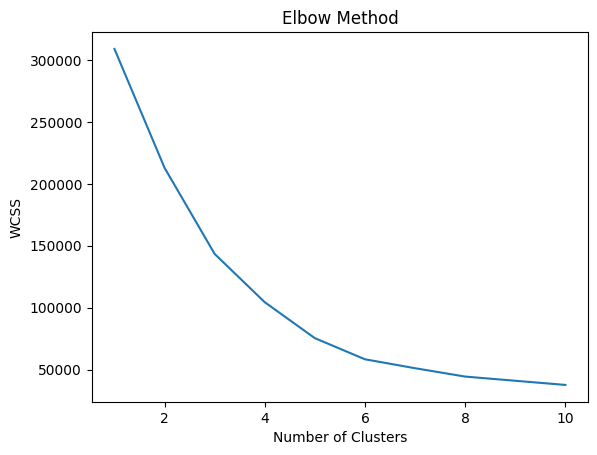

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Menghitung nilai WCSS (Within-Cluster Sum of Squares) untuk berbagai jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

ChatGPT prompt : cara mengetahui jumlah kluster terbaik menggunakan elbow method


Untuk mengetahui jumlah kluster terbaik menggunakan elbow method, Anda dapat melihat di mana titik "elbow" terjadi dalam plot nilai WCSS (Within-Cluster Sum of Squares) terhadap jumlah kluster. Titik "elbow" adalah titik di mana penurunan WCSS mulai melambat secara signifikan. Inilah jumlah kluster di mana penambahan kluster tambahan memberikan pengurangan yang berkurang secara signifikan dalam WCSS.

Berikut adalah langkah-langkahnya:

Buat plot: Gunakan nilai WCSS untuk setiap jumlah kluster sebagai sumbu y dan jumlah kluster sebagai sumbu x, lalu buat plot.
Identifikasi titik elbow: Perhatikan di mana plot mengalami perubahan dalam kecepatan penurunan. Biasanya, ini terjadi ketika nilai WCSS mulai turun secara signifikan dan kemudian kurvanya menjadi lebih landai. Titik di mana perubahan tersebut terjadi adalah titik elbow.
Tentukan jumlah kluster terbaik: Jumlah kluster terbaik adalah jumlah kluster yang sesuai dengan titik elbow tersebut.

ChatGPT prompt : berikan code untuk generate k means untuk 5 cluster

In [47]:
from sklearn.cluster import KMeans

## Generate K means clustering untuk 5 kelompok
kmeans = KMeans(n_clusters=5)

# Fit KMeans clustering model to the data
kmeans.fit(df)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Menambahkan label cluster ke DataFrame
df['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,1
1,0,21,15,81,3
2,1,20,16,6,1
3,1,23,16,77,3
4,1,31,17,40,1


Visualisasi hasil kluster

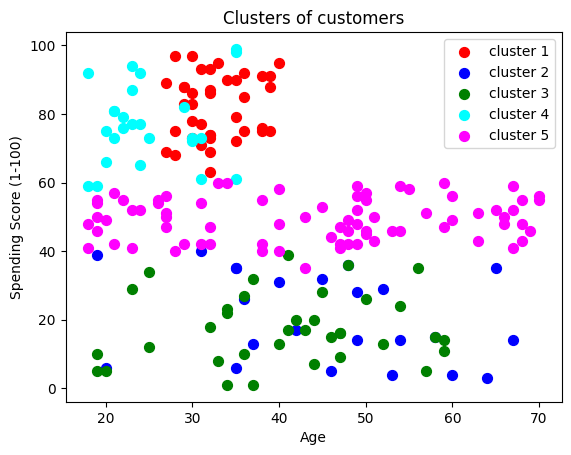

In [49]:
import matplotlib.pyplot as plt

#Visualisasi hasil klasterisasi untuk dua fitur untuk kluster 'Age' dan 'Spending Score(1-100)'
plt.scatter(df['Age'][df['cluster']==0], df['Spending Score (1-100)'][df['cluster']==0], s=50, c='red', label='cluster 1')
plt.scatter(df['Age'][df['cluster']==1], df['Spending Score (1-100)'][df['cluster']==1], s=50, c='blue', label='cluster 2')
plt.scatter(df['Age'][df['cluster']==2], df['Spending Score (1-100)'][df['cluster']==2], s=50, c='green', label='cluster 3')
plt.scatter(df['Age'][df['cluster']==3], df['Spending Score (1-100)'][df['cluster']==3], s=50, c='cyan', label='cluster 4')
plt.scatter(df['Age'][df['cluster']==4], df['Spending Score (1-100)'][df['cluster']==4], s=50, c='magenta', label='cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

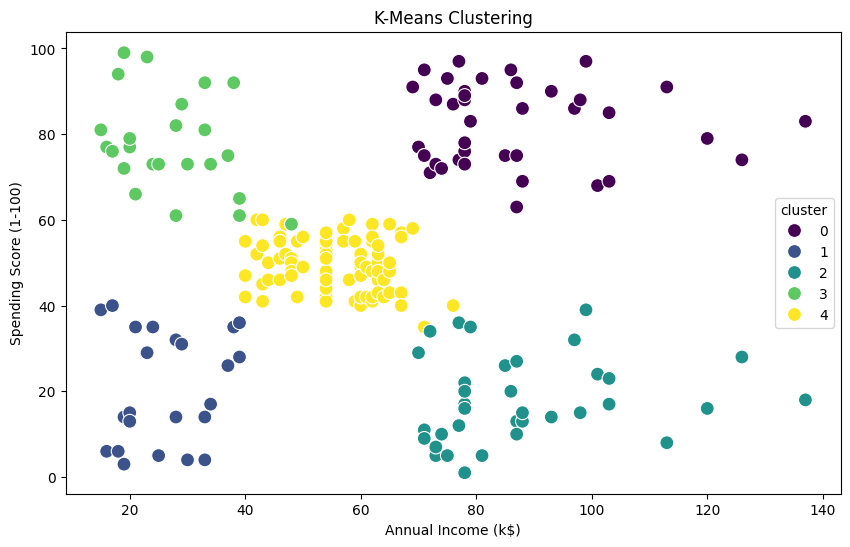

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualisasi hasil klasterisasi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title="cluster")
plt.show()


Evaluasi k-means menggunakan metode intertia, silhoutte score dan Davies-Bouldin index

ChatGPT prompt : berikan kode untuk evaluasi k-means

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Silhouette score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin index
davies_bouldin = davies_bouldin_score(df, kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin)


Inertia: 75528.58656469136
Silhouette Score: 0.4414231800810579
Davies-Bouldin Index: 0.8255181846524909
